### Prepare input data
from SQL and transformedImages folder

In [44]:
import helper
import numpy as np
import matplotlib.pyplot as MPL
#import queue
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

#for SQL engine
Session = helper.sessionmaker(bind=helper.engine)
session = Session()

#TODO : copy the transformedImages folder and the database from destination folder

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


training dataset size is : numberOfSamples:3456, image dimensions:(300, 600, 3)
entered extractTrainingData




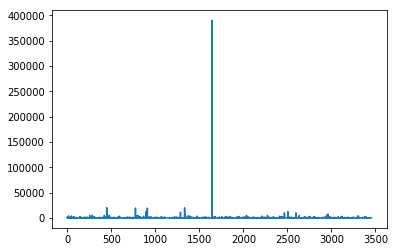

In [45]:
#get raw dimensions from dataset
numberOfSamples = helper.countElemsInDb(session)
dimensions = helper.getExampleImageDimensions(session)

#for training use image sizes
dimListXtrain=[numberOfSamples]
dimListXtrain.extend(helper.listFromTuple(dimensions))

#extract price
X_train = np.empty(dimListXtrain, dtype=np.uint8) #int8 as RGB 0-255
Y_train = np.empty([numberOfSamples])

print(f'training dataset size is : numberOfSamples:{numberOfSamples}, image dimensions:{dimensions}')
helper.extractTrainingData(session, X_train, Y_train) #keeps in memory, TODO: check if working from disk possible

#to have backup in case X_train wrongly modified later
Y_train_backup= Y_train
X_train_backup= X_train

MPL.plot(Y_train)

(3456,)


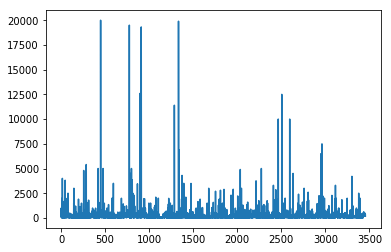

In [47]:
#Prune input data (remove entries with too high price (more than 10 x average))
Y_train = Y_train_backup
X_train = X_train_backup
print(np.shape(Y_train))
#WA pruning - everything > 20k
cutoffValue = 20000
arguments=np.where(Y_train > cutoffValue )
#print(Y_train[arguments[0]])

Y_train=np.delete(Y_train, arguments)
X_train=np.delete(X_train, arguments, axis=0)
MPL.plot(Y_train)
#TODO: smarter pruning, below in this document

In [51]:
#normalize the data (0 to 1)
#TODO: check if needed to normalize here or only with batches
#X_train_NN = X_train/np.max(X_train)
#Y_train_NN = Y_train/np.max(Y_train)

In [ ]:
print(np.shape(Y_train_NN))


### References
#https://www.pythoninformer.com/python-libraries/numpy/numpy-and-images/

### Todos

#### Data prune

In [239]:
#First prune through dataset to extract highest offenders
#avgToMedianRatio = np.average(Y_train)/np.median(Y_train)
#cutoffValue = avgToMedianRatio * np.average(Y_train)
#print(f'avgToMedianRatio {avgToMedianRatio} cutoffValue {cutoffValue}')

#valuesGreaterThanCutoff1_args = np.argwhere(Y_train>cutoffValue)
#print(f'valuesGreaterThanCutoff {valuesGreaterThanCutoff}')
#valuesGreaterThanCutoff1 = Y_train[valuesGreaterThanCutoff1_args]
#print(f'args {valuesGreaterThanCutoff1_args} valuesGreaterThanCutoff {valuesGreaterThanCutoff1}')

#can delete highest offenders to realize the statistic
#Y_train=np.delete(Y_train, valuesGreaterThanCutoff1_args)
#print(np.shape(Y_train))
#
#avgToMedianRatio = np.average(Y_train)/np.median(Y_train)
#cutoffValue = avgToMedianRatio * np.average(Y_train)
#print(f'avgToMedianRatio {avgToMedianRatio} cutoffValue {cutoffValue}')
#

#MPL.plot(Y_train)

#Second prune to identify offenders
#avgToMedianRatio = np.average(valuesGreaterThanCutoff1)/np.median(valuesGreaterThanCutoff1)
#cutoffValue = avgToMedianRatio * np.average(valuesGreaterThanCutoff1)
#print(f'avgToMedianRatio {avgToMedianRatio} cutoffValue {cutoffValue}')
#
#print('debug')
#print(np.shape(valuesGreaterThanCutoff1))
#valuesGreaterThanCutoff2_args = np.argwhere(valuesGreaterThanCutoff1>cutoffValue)
#print(valuesGreaterThanCutoff1[43])
#print(valuesGreaterThanCutoff2_args[0])
##print(f'valuesGreaterThanCutoff {valuesGreaterThanCutoff}')
#valuesGreaterThanCutoff2 = valuesGreaterThanCutoff1[valuesGreaterThanCutoff2_args]
#print(f'valuesGreaterThanCutoff2_args {valuesGreaterThanCutoff2_args} valuesGreaterThanCutoff2 {valuesGreaterThanCutoff2}')
#print()
#
#print(f'valuesGreaterThanCutoff {valuesGreaterThanCutoff2_args}')
#print(f'sum max value is {np.sum(Y_train) - np.max(Y_train)}')
#

#Plotting offenders to get good hunch feeling
##plot(Y_train)
#import matplotlib.pyplot as MPL
##PL.figure()
#MPL.plot(valuesGreaterThanCutoff1)
#print(max(Y_train))
#maxargument = np.argmax(Y_train)
#print(maxargument)
##print(X_train[maxargument])
#Image.fromarray(X_train[13])

#### Debug

In [20]:
#convert image file into RGB
#from PIL import Image

img = Image.open('transformedImages/Olgemalde-Landschaft-Natur-Flusslauf-Bild-Signiert-Tillio-Francalanci.jpg')

array = np.array(img)
print(array.shape)
#first dimension is height, second is width, third are channels


(300, 600, 3)


In [151]:
#import skimage
tempImage = helper.convertJpgToRGBArray('transformedImages/G-Hartel-junkyard-romantic-XXIII-80cm-x-60-cm-acryl-Lw.jpg')
#tempImage = helper.convertJpgToRGBArray('transformedImages/G-Hartel-junkyard-romantic-XXXI-60cmx80-cm-acryl-Lw.jpg')


#print(tempImage)

In [127]:
print(np.shape(tempImage))

(300, 600, 3)
